In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
df = pd.read_csv('Master Pulido Final.csv')
#df=df[['TIME ','Esteban Ramírez  ','Jean Carlos Sanchez  ','JUGADAS','Exito']]
#df.head(5)
df=df.loc[(df["Resultado"] == "Positivo")]
#df= df.loc[(df["Partido"] == "Alajuelense")]
#df= df.loc[(df["SELECT"] ==23)]
#df= df.loc[(df["Marcaje"] =="Zonal")]


df=df[['TIME','Jean Carlo Agüero','Lucien Galtier']]
df.head()

,TIME,Jean Carlo Agüero,Lucien Galtier
0,19:16:31 000,3.190068,12.106200
1,19:16:31 009,3.116520,12.036000
2,19:16:31 019,3.034800,11.958000
3,19:16:31 029,2.993400,11.880000
4,19:16:31 039,2.952000,11.812582


In [7]:

df['TIME'] =  pd.to_datetime(df['TIME'], format='%H:%M:%S %f')
#df = df.loc[(df['TIME'] > "1900-01-01 3:34:47")]
#df = df.loc[(df['TIME'] > "1900-01-01 4:51:47")&(df['TIME'] <= "1900-01-01 4:51:53")]
#df_30 = df.loc[(df["TIME"] >= "1900-01-01 19:15:00") & (df['TIME'] <= "1900-01-01 19:30:00")]

df = df.set_index('TIME')
#df_45 = df.loc[(df["TIME"] >= "1900-01-01 19:10:47") & (df['TIME'] <= "1900-01-01 19:10:59")]


#overall_pearson_r_60 = df_60.corr().iloc[0,1]
overall_pearson_r = df.corr().iloc[0,1]

print(f"Pearson r: {overall_pearson_r}")
#print(f"Pearson r: {overall_pearson_r_30}")
#print(f"Pearson r: {overall_pearson_r_45}")
#print(f"Pearson r: {overall_pearson_r_60}")



Pearson r: 0.8288654675654079


In [8]:
r, p = stats.pearsonr(df.dropna()['Jean Carlo Agüero'], df.dropna()['Lucien Galtier'])
print(f"Scipy Pearson r: {r} y el p-value: {p}")

Scipy Pearson r: 0.8288654675654082 y el p-value: 0.0


[Text(0.5, 1.0, 'Pearson r = 0.83')]

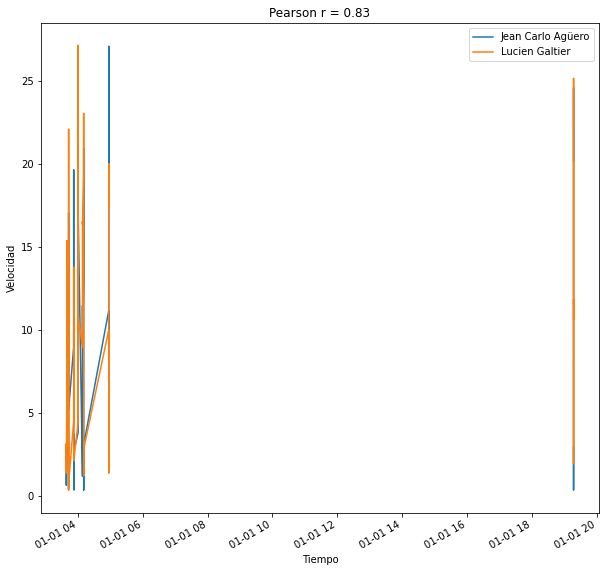

In [9]:
f,ax=plt.subplots(figsize=(10,10))
#df_ex = df_ex.set_index('TIME ')
df.rolling(window=10,center=True).median().plot(ax=ax)
ax.set(xlabel='Tiempo',ylabel='Velocidad')
ax.set(title=f"Pearson r = {np.round(overall_pearson_r,2)}")

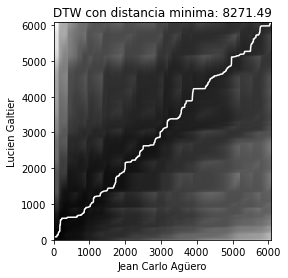

In [19]:
from dtw import dtw,accelerated_dtw

d1 = df['Jean Carlo Agüero'].interpolate().values
d2 = df['Lucien Galtier'].interpolate().values
#d3 = df['Matthew Bolaños  '].interpolate().values


d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Jean Carlo Agüero')
plt.ylabel('Lucien Galtier')
plt.title(f'DTW con distancia minima: {np.round(d,2)}')
plt.show()

In [25]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y



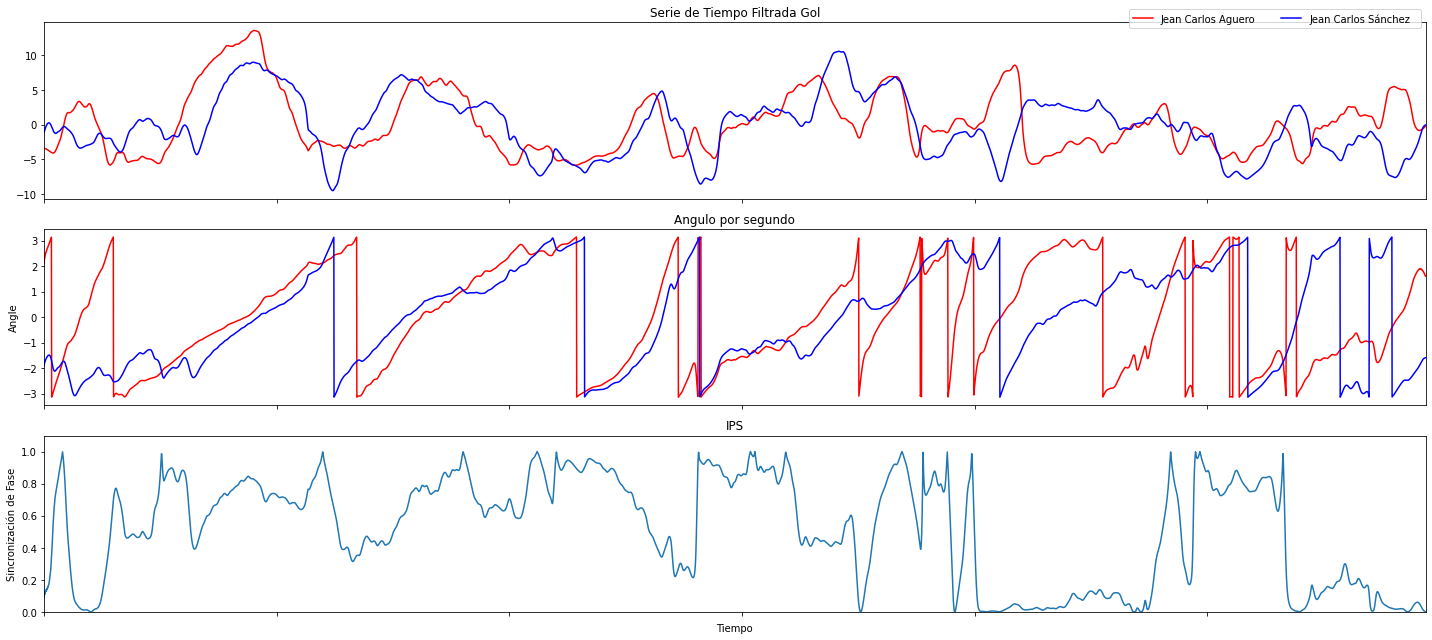

In [26]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = df['Jean Carlo Agüero'].interpolate().values
d2 = df['Lucien Galtier'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(20,9),sharex=True)
ax[0].plot(y1,color='r',label='Jean Carlos Aguero  ')
ax[0].plot(y2,color='b',label='Jean Carlos Sánchez  ')
ax[0].legend(bbox_to_anchor=(0., 1.00, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Serie de Tiempo Filtrada Gol')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angulo por segundo',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='IPS',xlabel='Tiempo',ylabel='Sincronización de Fase',xticklabels=[])
plt.tight_layout()
plt.show()

In [6]:
pd.DataFrame(phase_synchrony).to_csv(r'C:\Users\gabri\OneDrive\Desktop\export_dataframeV5.csv', index=False, header=True)

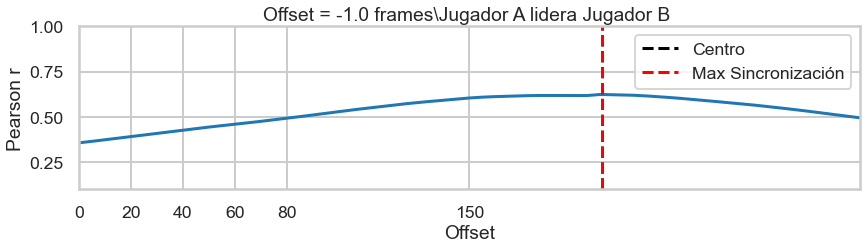

In [9]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['Jean Carlo Agüero']
d2 = df['Lucien Galtier']
seconds = 10
fps = 20
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Centro')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Max Sincronización')
ax.set(title=f'Offset = {offset} frames\Jugador A lidera Jugador B ',ylim=[.1,1.0],xlim=[0,300], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 20, 40, 60, 80, 150])
ax.set_xticklabels([0, 20, 40, 60, 80, 150]);
plt.legend()

In [415]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set_context('poster',font_scale=.8)
sns.set_style('whitegrid')
mpl.rc('figure',figsize=(15,2))


C:\Users\gabri\AppData\Local\Temp\ipykernel_24012\2240647946.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.hstack(df.mask(np.tril(np.ones(df.shape),k=k).astype(np.bool)).values.tolist())


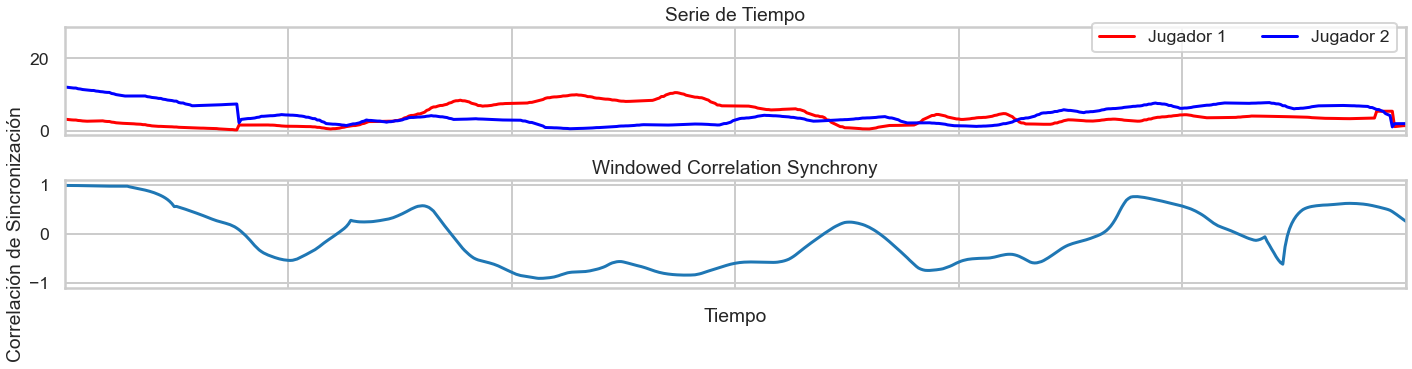

In [416]:
def get_triangle(df,k=0):

    x = np.hstack(df.mask(np.tril(np.ones(df.shape),k=k).astype(np.bool)).values.tolist())
    x = x[~np.isnan(x)]
    return x  

def rolling_correlation(data, wrap=False, *args, **kwargs):
    data_len = data.shape[0]
    half_data_len = int(data.shape[0]/2)
    start_len = data.iloc[half_data_len:].shape[0]
    if wrap:
        data = pd.concat([data.iloc[half_data_len:],data,data.iloc[:half_data_len]],axis=0).reset_index(drop=True)
    _rolling = data.rolling(*args, **kwargs).corr()       
    rs=[]
    for i in np.arange(0,data.shape[0]):
        rs.append(get_triangle(_rolling.loc[i]))
    rs = pd.DataFrame(rs)   
    rs = rs.iloc[start_len:start_len+data_len].reset_index(drop=True)
    return rs  

N = 600 # number of smaples
T = 1.0 / 200.0 # sample spacing
x = np.linspace(0.0, N*T, N)
window_size = 100
phase_y1, phase_y2 = 50., 50.
amp_y1, amp_y2 = 1.,3.

y1 = df['Jean Carlo Agüero'].interpolate().values
y2 = df['Lucien Galtier'].interpolate().values
window=100
al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
f,ax = plt.subplots(2,1,figsize=(20,5),sharex=True)
ax[0].plot(y1,color='r',label='Jugador 1')
ax[0].plot(y2,color='b',label='Jugador 2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Serie de Tiempo')
window_corr_synchrony = rolling_correlation(data=pd.DataFrame({'Jugador A':y1,'Jugador B':y2}),wrap=True,window=window_size,center=True)
window_corr_synchrony.plot(ax=ax[1],legend=False)
ax[1].set(ylim=[-1.1,1.1],xlim=[0,N],title='Windowed Correlation Synchrony',xlabel='Tiempo',ylabel='Correlación de Sincronización',xticklabels=[])
plt.tight_layout()
plt.show()

In [417]:
window_corr_synchrony.to_csv(r'C:\Users\gabri\OneDrive\Desktop\export_dataframeV3.csv', index=False, header=True)